In [1]:
# Charger les données
import pandas as pd

data = pd.read_csv('heart.csv')
print(data.head())
#print(data.describe())

    age  sex  chest pain type  resting blood pressure  \
0  70.0  1.0              4.0                   130.0   
1  67.0  0.0              3.0                   115.0   
2  57.0  1.0              2.0                   124.0   
3  64.0  1.0              4.0                   128.0   
4  74.0  0.0              2.0                   120.0   

   serum cholestoral in mg/dl  fasting blood sugar   \
0                       322.0                   0.0   
1                       564.0                   0.0   
2                       261.0                   0.0   
3                       263.0                   0.0   
4                       269.0                   0.0   

   resting electrocardiographic results  maximum heart rate achieved  \
0                                   2.0                        109.0   
1                                   2.0                        160.0   
2                                   0.0                        141.0   
3                                   0.

In [2]:
# Regarder les données manquantes

data.columns = ['age', 'sex', 'chest pain type', 'resting blood pressure','serum cholestoral','fasting blood sugar','resting electrocardiographic results', 'maximum heart rate achieved', 'exercise induced angina', 'oldpeak', 'the slope of the peak exercise ST segment', 'number of major vessels (0-3) colored by flourosopy', 'thal fixed reversable defect', 'Variable to be predicted']
data.isnull().sum()

age                                                    0
sex                                                    0
chest pain type                                        0
resting blood pressure                                 0
serum cholestoral                                      0
fasting blood sugar                                    0
resting electrocardiographic results                   0
maximum heart rate achieved                            0
exercise induced angina                                0
oldpeak                                                0
the slope of the peak exercise ST segment              0
number of major vessels (0-3) colored by flourosopy    0
thal fixed reversable defect                           0
Variable to be predicted                               0
dtype: int64

In [3]:
# On separe le jeu de donnée en 2 sous-jeu de donnée X et Y
from sklearn import preprocessing

X = data.iloc[:,:13].values
y = data.iloc[:,13:].values

In [4]:
print(X.shape)
print(y.shape)

(270, 13)
(270, 1)


In [5]:
### Simulation de données en deux dimensions séparables linéairement
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5,stratify=y, random_state=1) #

model = StandardScaler() 
X_train = model.fit_transform(X_train) 
#X_train = model.transform(X_train) 
X_test = model.transform(X_test) 

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(135, 13)
(135, 13)
(135, 1)
(135, 1)


In [7]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = [{'kernel': ['rbf'], 'gamma': np.logspace(-2, 1, 4),'C': np.logspace(0, 4, 5)},
               {'kernel': ['linear'], 'C': np.logspace(-1, 1, 3)},
               {'kernel':['poly'], 'degree':[1, 2, 3, 4], 'C': np.logspace(-2, 2, 5)}]

model = GridSearchCV(
    estimator=SVC(class_weight ={1: 5, 2: 1}),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

model.fit(X_train,y_train.ravel())

GridSearchCV(cv=5, estimator=SVC(class_weight={1: 5, 2: 1}),
             param_grid=[{'C': array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
                          'gamma': array([ 0.01,  0.1 ,  1.  , 10.  ]),
                          'kernel': ['rbf']},
                         {'C': array([ 0.1,  1. , 10. ]), 'kernel': ['linear']},
                         {'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'degree': [1, 2, 3, 4], 'kernel': ['poly']}],
             scoring='accuracy')

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
print("Résultats de validation sur l'ensemble des paramètres:")
for mean, std, params in zip(model.cv_results_['mean_test_score'],
                            model.cv_results_['std_test_score'],
                            model.cv_results_['params']
                            ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format('accuracy',mean,std*2,params))

Résultats de validation sur l'ensemble des paramètres:
accuracy = 0.733 (+/-0.119) for {'C': 1.0, 'gamma': 0.01, 'kernel': 'rbf'}
accuracy = 0.815 (+/-0.105) for {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}
accuracy = 0.548 (+/-0.030) for {'C': 1.0, 'gamma': 1.0, 'kernel': 'rbf'}
accuracy = 0.556 (+/-0.000) for {'C': 1.0, 'gamma': 10.0, 'kernel': 'rbf'}
accuracy = 0.778 (+/-0.162) for {'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}
accuracy = 0.793 (+/-0.218) for {'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}
accuracy = 0.563 (+/-0.055) for {'C': 10.0, 'gamma': 1.0, 'kernel': 'rbf'}
accuracy = 0.556 (+/-0.000) for {'C': 10.0, 'gamma': 10.0, 'kernel': 'rbf'}
accuracy = 0.785 (+/-0.206) for {'C': 100.0, 'gamma': 0.01, 'kernel': 'rbf'}
accuracy = 0.793 (+/-0.218) for {'C': 100.0, 'gamma': 0.1, 'kernel': 'rbf'}
accuracy = 0.563 (+/-0.055) for {'C': 100.0, 'gamma': 1.0, 'kernel': 'rbf'}
accuracy = 0.556 (+/-0.000) for {'C': 100.0, 'gamma': 10.0, 'kernel': 'rbf'}
accuracy = 0.785 (+/-0.212) for {'C': 1


Meilleurs estimator:  SVC(class_weight={1: 5, 2: 1}, gamma=0.1)


Meilleurs paramètres:  {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}

Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.89      0.85        75
           2       0.85      0.73      0.79        60

    accuracy                           0.82       135
   macro avg       0.83      0.81      0.82       135
weighted avg       0.82      0.82      0.82       135

Accuracy score:
0.8222222222222222

Matrice de confusion:


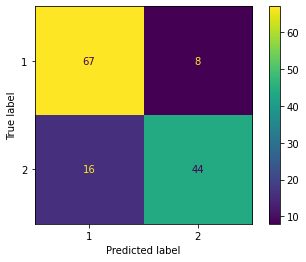

In [9]:
print()
print("Meilleurs estimator: ", model.best_estimator_)
print()
print()
print("Meilleurs paramètres: ", model.best_params_)
print()


best_model = model.best_estimator_
y_pred = best_model.predict(X_test)    


result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy score:",)
print(result2)
print()
print("Matrice de confusion:")
plot_confusion_matrix(best_model, X_test, y_test)